# GooglePlay Project:

# Group 2


### Name of students:

יאיר עוגן

הוד גיספאן

דניאל חתוכה





<div>
<img src="https://github.com/Yairvedaniel/project1/blob/main/PHOTO-2024-06-05-14-34-50.jpg?raw=true" width="400"/>
</div>



<a id="top"></a>
# Table of Contents
1. [Introduction](#introduction)
2. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)

    2.1 [Checking Values](#checking-Values)
3. [Paid Apps vs Free Apps](#paid-apps-vs-free-apps)

    3.1 [הקשר בין גודל האפליקציה לפופולריות שלה](#הקשר-בין-גודל-האפליקציה-לפופולריות-שלה)

<a id="introduction"></a>
## 1.Introduction:

[back to top](#top)

### information on tha data
We'll work with a dataset, based on [Google Play Store](https://play.google.com/store/apps)

The source of the data file  [here](https://www.kaggle.com/datasets/bhavikjikadara/google-play-store-applications/data)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/hodsfiles/HrDataProject/main/googleplaystore.csv'
apps = pd.read_csv(url)
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
apps.shape

(10841, 14)

In [5]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

<a id="data-cleaning-and-preprocessing"></a>
## 2.Data Cleaning and Preprocessing:

[back to top](#top)


הסרת עמודה מיותרת

In [6]:
apps = apps.drop('Unnamed: 0', axis=1)
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<a id='checking-Values'></a>
#### 2.1 checking values
[back to top](#top)

In [7]:
apps.duplicated().sum()

483

In [8]:
#On play store, two apps may have same name, but all the size, installs, rating, reviews, price need not be same. so using these categories, we will drop the duplicates in the data
apps.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [9]:
apps.duplicated().sum()

0

In [10]:
apps.shape

(10350, 13)

In [11]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


הסרת שורות בעלי ערכים חסרים בודדים

In [12]:
apps = apps.dropna(subset=['Current Ver'])
apps = apps.dropna(subset=['Android Ver'])
apps = apps.dropna(subset=['Content Rating'])
apps = apps.dropna(subset=['Type'])

In [13]:
apps.shape

(10338, 13)

ישנו ערך קטגורי החוזר על עצמו במקרים רבים בעמודות מספריות. לאחר חשיבה בנוגע לנחיצותו בניתוח הנתונים - החלטנו להמיר אותו ב NaN

In [14]:
apps.replace('Varies with device', np.nan, inplace=True)


הסרת תווים מיוחדים מעמודות מספריות

In [15]:
# Columns to clean 
cols = ['Installs','Price']

# Characters to remove
chars = ['+',",","$"]

# storing columns_to_clean in col variable
for col in cols:
    # storing characters_to_clean in char variable
    for char in chars:
            apps[col] = apps[col].apply(lambda c: c.replace(char, ''))


In [16]:
def size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1000
    return None

apps.loc[:, 'Size_MB'] = apps['Size'].apply(size_to_mb)

# Display the first few rows to verify the changes
print(apps[['Size', 'Size_MB']].head())


   Size  Size_MB
0   19M     19.0
1   14M     14.0
2  8.7M      8.7
3   25M     25.0
4  2.8M      2.8


In [17]:
apps = apps.drop('Size', axis=1)

In [18]:
missing_data = apps.isnull().sum()
print("Missing data before handling:", "\n")
print(missing_data)

Missing data before handling: 

App                  0
Category             0
Rating            1460
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB           1524
dtype: int64


In [19]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [20]:
apps.Reviews = pd.to_numeric(apps.Reviews, errors='coerce')
apps.Price = pd.to_numeric(apps.Price, errors='coerce')
apps.Rating = pd.to_numeric(apps.Rating, errors='coerce')
apps.Installs = pd.to_numeric(apps.Installs, errors='coerce') 
apps.Size_MB = pd.to_numeric(apps.Size_MB, errors='coerce') 
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [21]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1460
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB           1524
dtype: int64


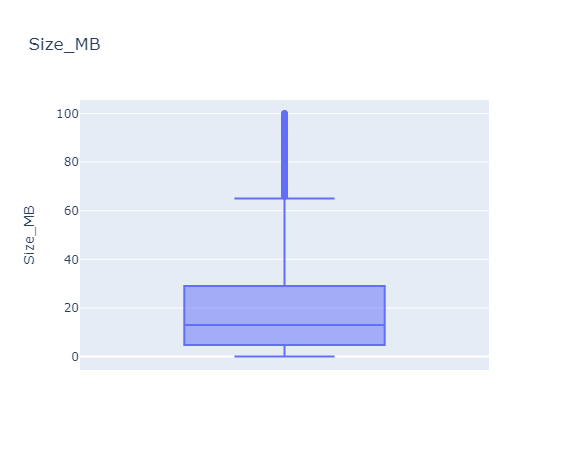

In [22]:
fig = px.box(apps, y='Size_MB', title='Size_MB', width=300, height=450)

# Show the plot
fig.show()

בדיקת חריגות בעמודות הרצויות

עמודת גודל האפליקציה = קיים פיזור רחב של הנתונים, ע''מ שהערכים החריגים לא ישפיעו על התפלגות הנתונים בצורה דומיננטית - נמלא את הערכים החסרים בחציון.
 חציון אינו מושפע מערכים קיצוניים, ולכן מספק ניתוח יציב יותר

In [23]:
median_size_mb = apps['Size_MB'].median()

# מילוי הערכים החסרים בעמודת Size_MB בחציון
apps['Size_MB'] = apps['Size_MB'].fillna(median_size_mb)

# הצגת התוצאה כדי לוודא שהערכים החסרים מולאו
print(apps['Size_MB'].isna().sum()) 

0


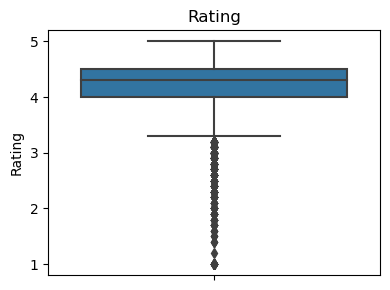

In [24]:
# Creating boxplots for each column and displaying them in the same row
fig, axes = plt.subplots(figsize=(4,3))
plt.subplot()
sns.boxplot(data=apps, y='Rating')
plt.title('Rating')

plt.tight_layout()
plt.show()

In [25]:
median_rate = apps['Rating'].median()

# מילוי הערכים החסרים בעמודת Size_MB בחציון
apps['Rating'] = apps['Rating'].fillna(round(median_rate, 2))

# הצגת התוצאה כדי לוודא שהערכים החסרים מולאו
print(apps['Rating'].isna().sum())

0


In [26]:
missing_data = apps.isnull().sum()
print("Missing data after handling:")
print(missing_data)

Missing data after handling:
App                  0
Category             0
Rating               0
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB              0
dtype: int64


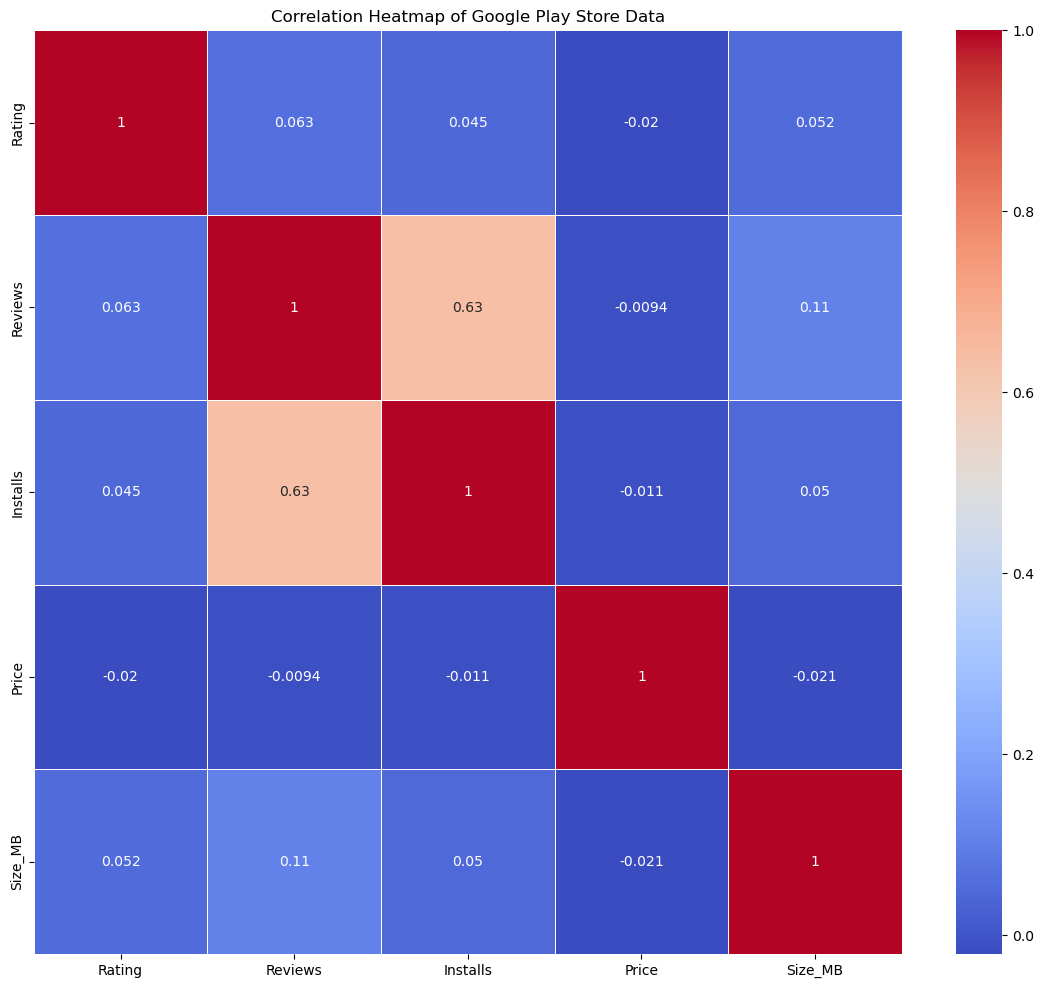

In [27]:
plt.figure(figsize=(14, 12))
correlation_matrix = apps.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Google Play Store Data')
plt.show()

לאחר בדיקת התאמות (קורלציות) בין העמודות. ניתן לראות כי מלבד הקשר בין ביקורות להתקנות אין קשרים חזקים. לכן, אנו נרד לעומק הנתונים ונחקור אותם

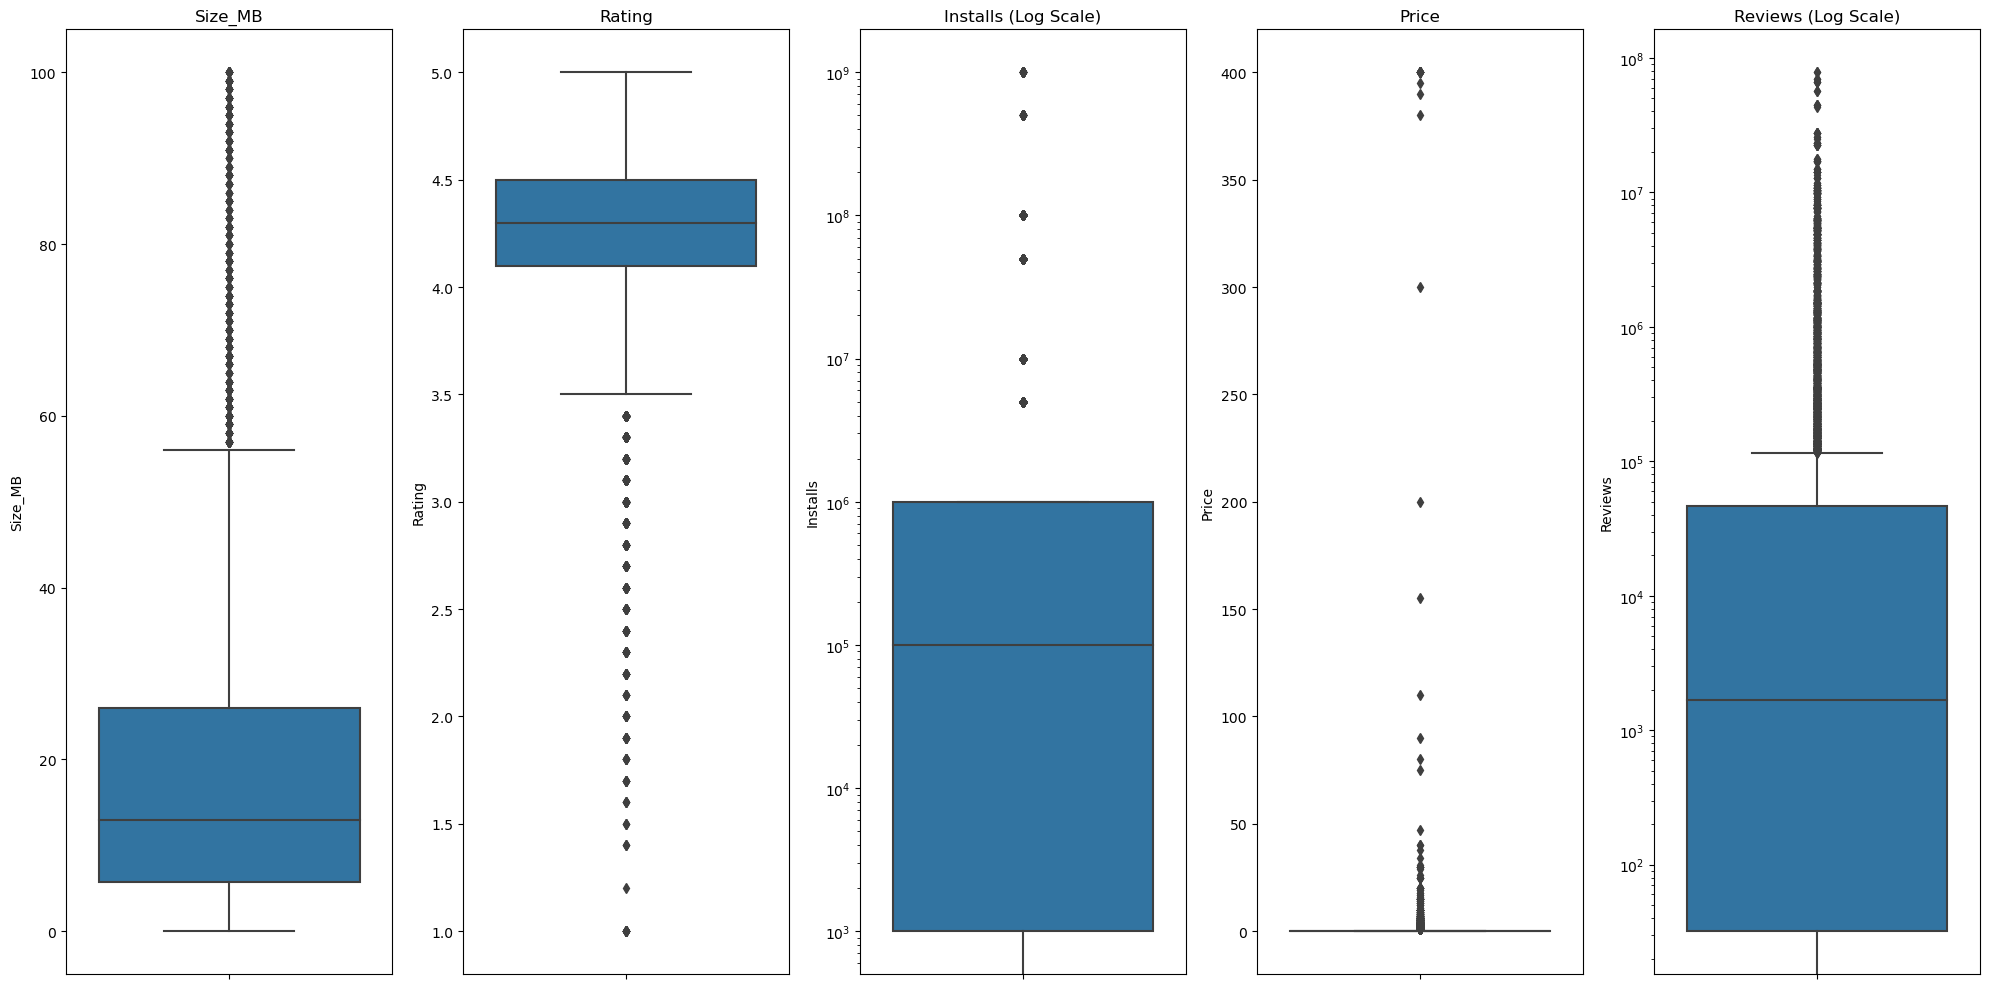

In [28]:
plt.figure(figsize=(20, 10))

# יצירת גרפי Box plot לכל עמודה והצגתן באותה השורה
plt.subplot(1, 5, 1)
sns.boxplot(data=apps, y='Size_MB')
plt.title('Size_MB')

plt.subplot(1, 5, 2)
sns.boxplot(data=apps, y='Rating')
plt.title('Rating')

plt.subplot(1, 5, 3)
sns.boxplot(data=apps, y='Installs')
plt.yscale('log')
plt.title('Installs (Log Scale)')

plt.subplot(1, 5, 4)
sns.boxplot(data=apps, y='Price')
plt.title('Price')

plt.subplot(1, 5, 5)
sns.boxplot(data=apps, y='Reviews')
plt.yscale('log')
plt.title('Reviews (Log Scale)')

plt.tight_layout()
plt.show()

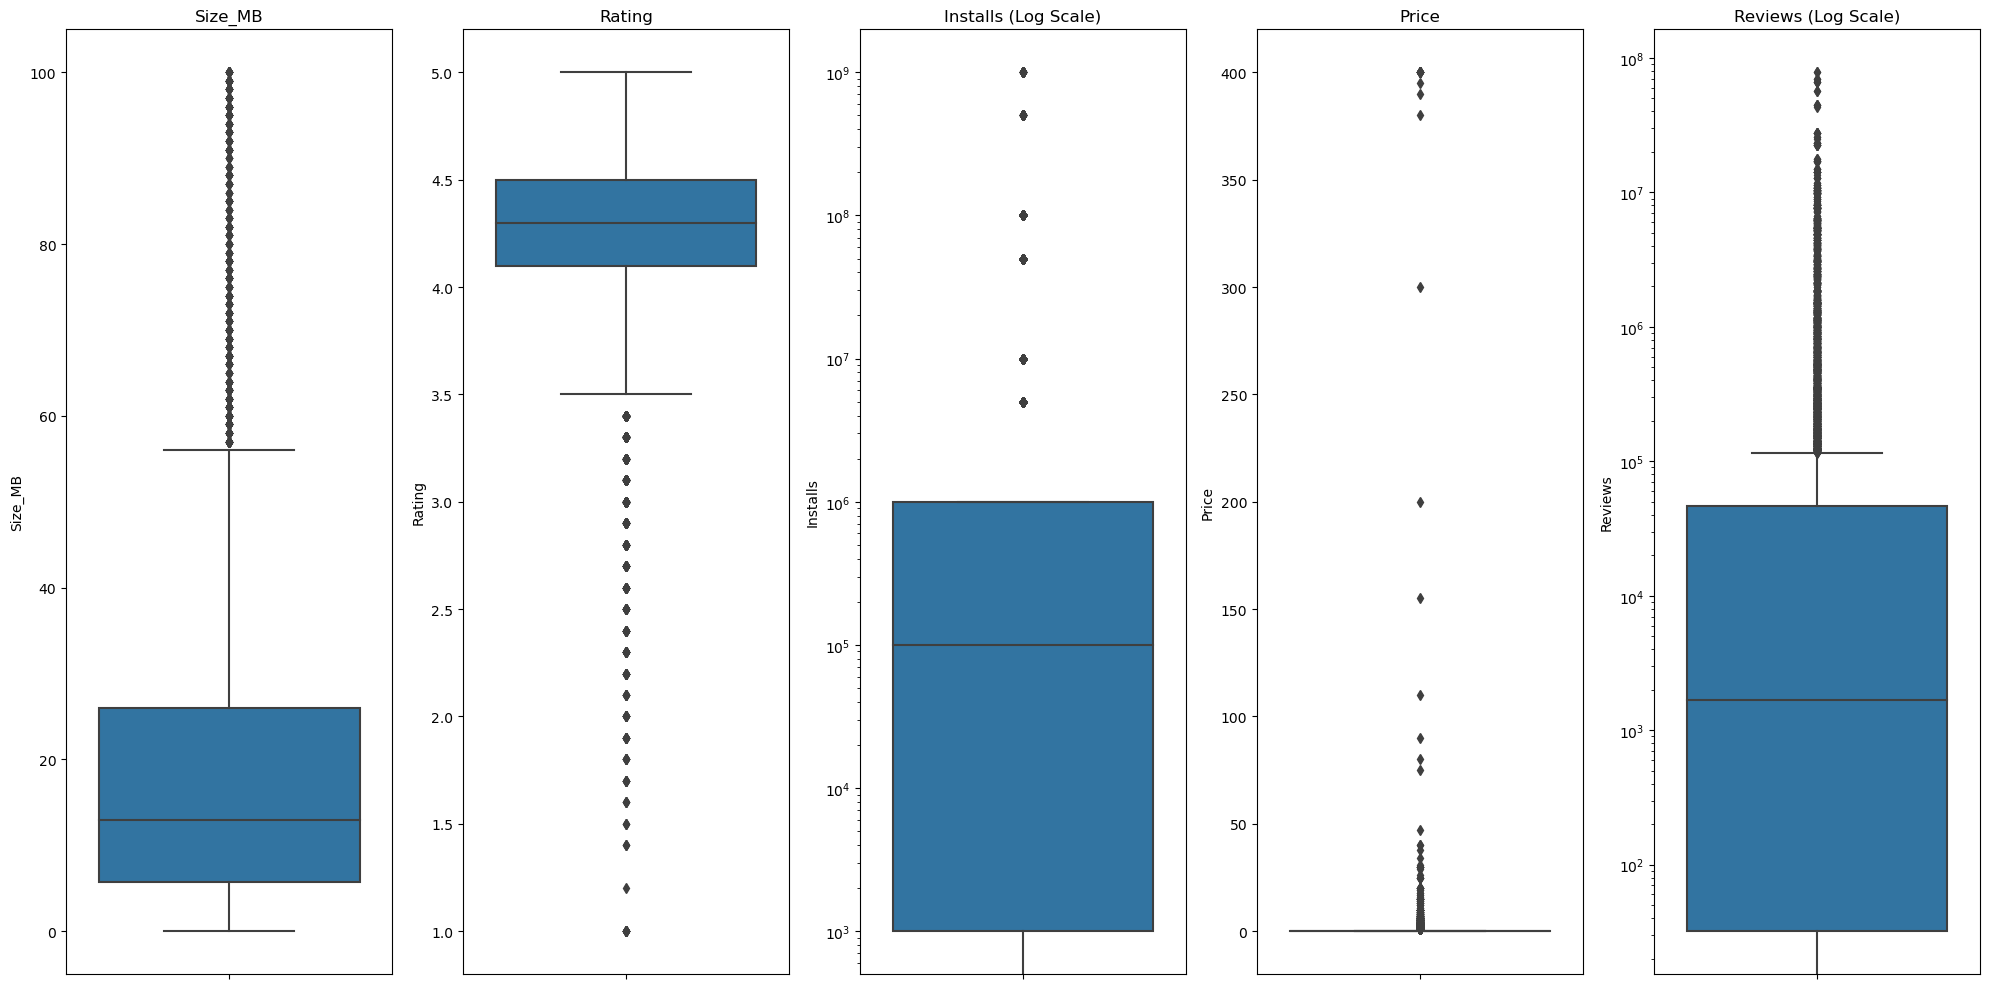

In [29]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# גרף של Size_MB
sns.boxplot(data=apps, y='Size_MB', ax=axes[0])
axes[0].set_title('Size_MB')

# גרף של Rating
sns.boxplot(data=apps, y='Rating', ax=axes[1])
axes[1].set_title('Rating')

# גרף של Installs עם סקאלה לוגריתמית
sns.boxplot(data=apps, y='Installs', ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_title('Installs (Log Scale)')

# גרף של Price
sns.boxplot(data=apps, y='Price', ax=axes[3])
axes[3].set_title('Price')

# גרף של Reviews עם סקאלה לוגריתמית
sns.boxplot(data=apps, y='Reviews', ax=axes[4])
axes[4].set_yscale('log')
axes[4].set_title('Reviews (Log Scale)')

plt.tight_layout()
plt.show()

<a id="paid-apps-vs-free-apps"></a>
## 3.Paid Apps vs Free Apps:

[back to top](#top)

בדיקת הקשרים בין אפליקציות בתשלום\חינמיות אל מול שאר הנתונים

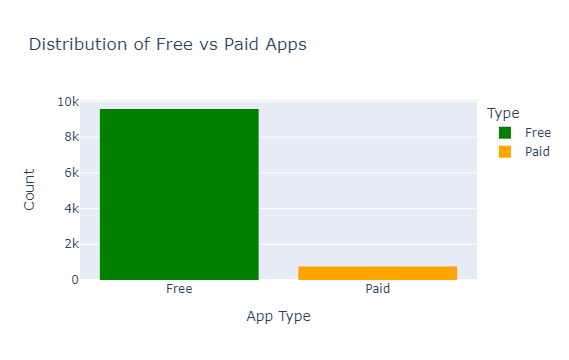

In [30]:
fig = px.histogram(apps, x='Type', color='Type', color_discrete_map={'Free': 'green', 'Paid': 'orange'}, title='Distribution of Free vs Paid Apps')

# הגדרת שמות צירים
fig.update_layout(
    xaxis_title='App Type',
    yaxis_title='Count'
)

# הצגת הגרף
fig.show()

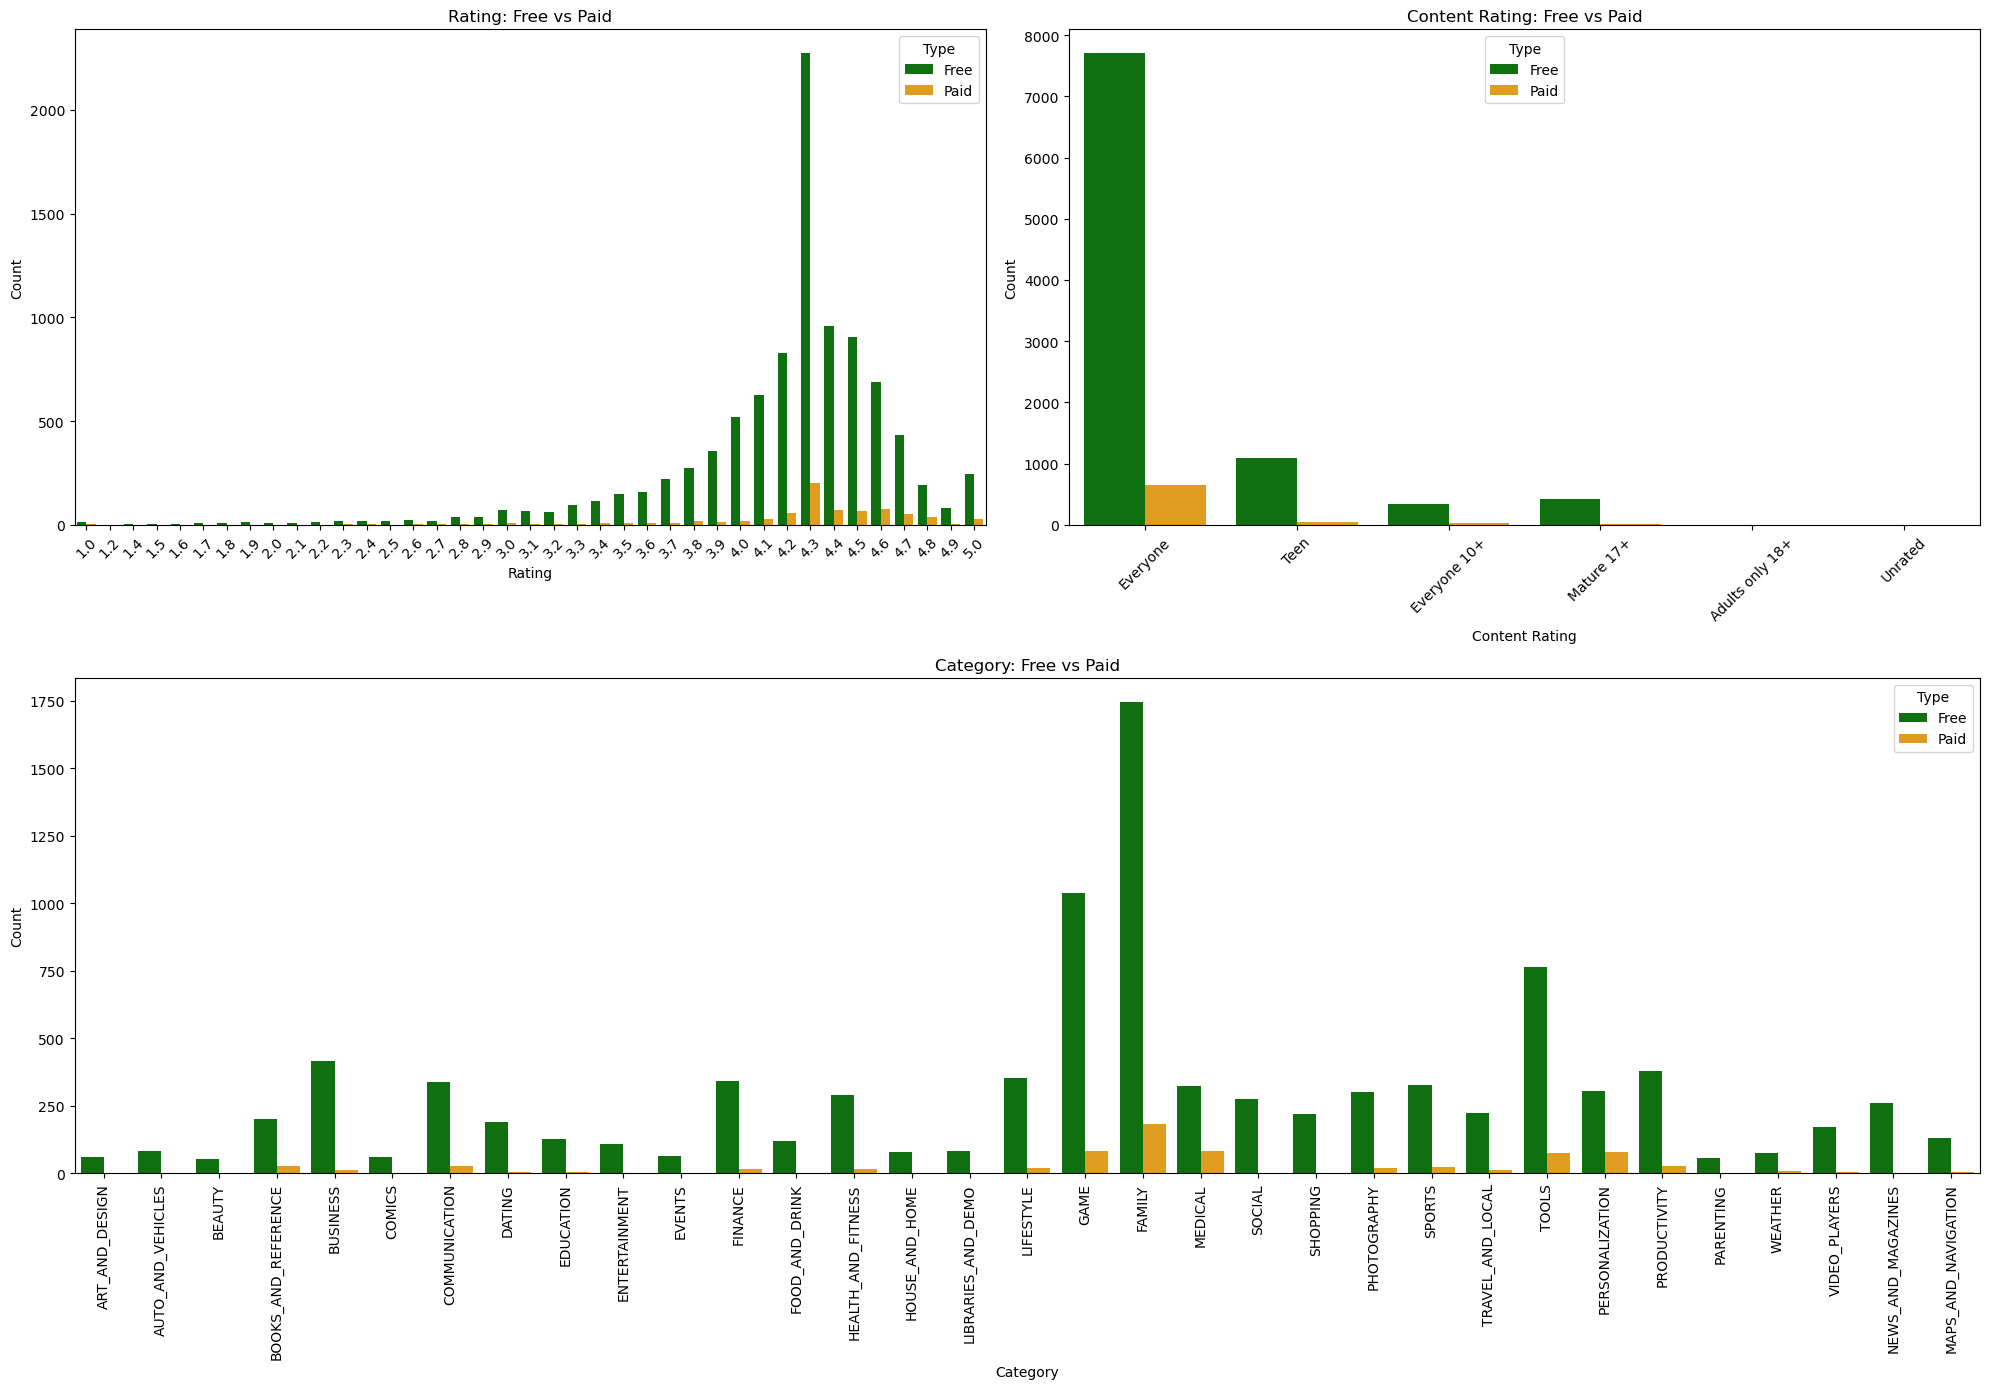

In [31]:
palette = {'Free': 'green', 'Paid': 'orange'}
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.countplot(x='Rating', hue='Type', data=apps, palette=palette, ax=ax1).set(title='Rating: Free vs Paid', xlabel='Rating', ylabel='Count')
sns.countplot(x='Content Rating', hue='Type', data=apps, palette=palette, ax=ax2).set(title='Content Rating: Free vs Paid', xlabel='Content Rating', ylabel='Count')
sns.countplot(x='Category', hue='Type', data=apps, palette=palette, ax=ax3).set(title='Category: Free vs Paid', xlabel='Category', ylabel='Count')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

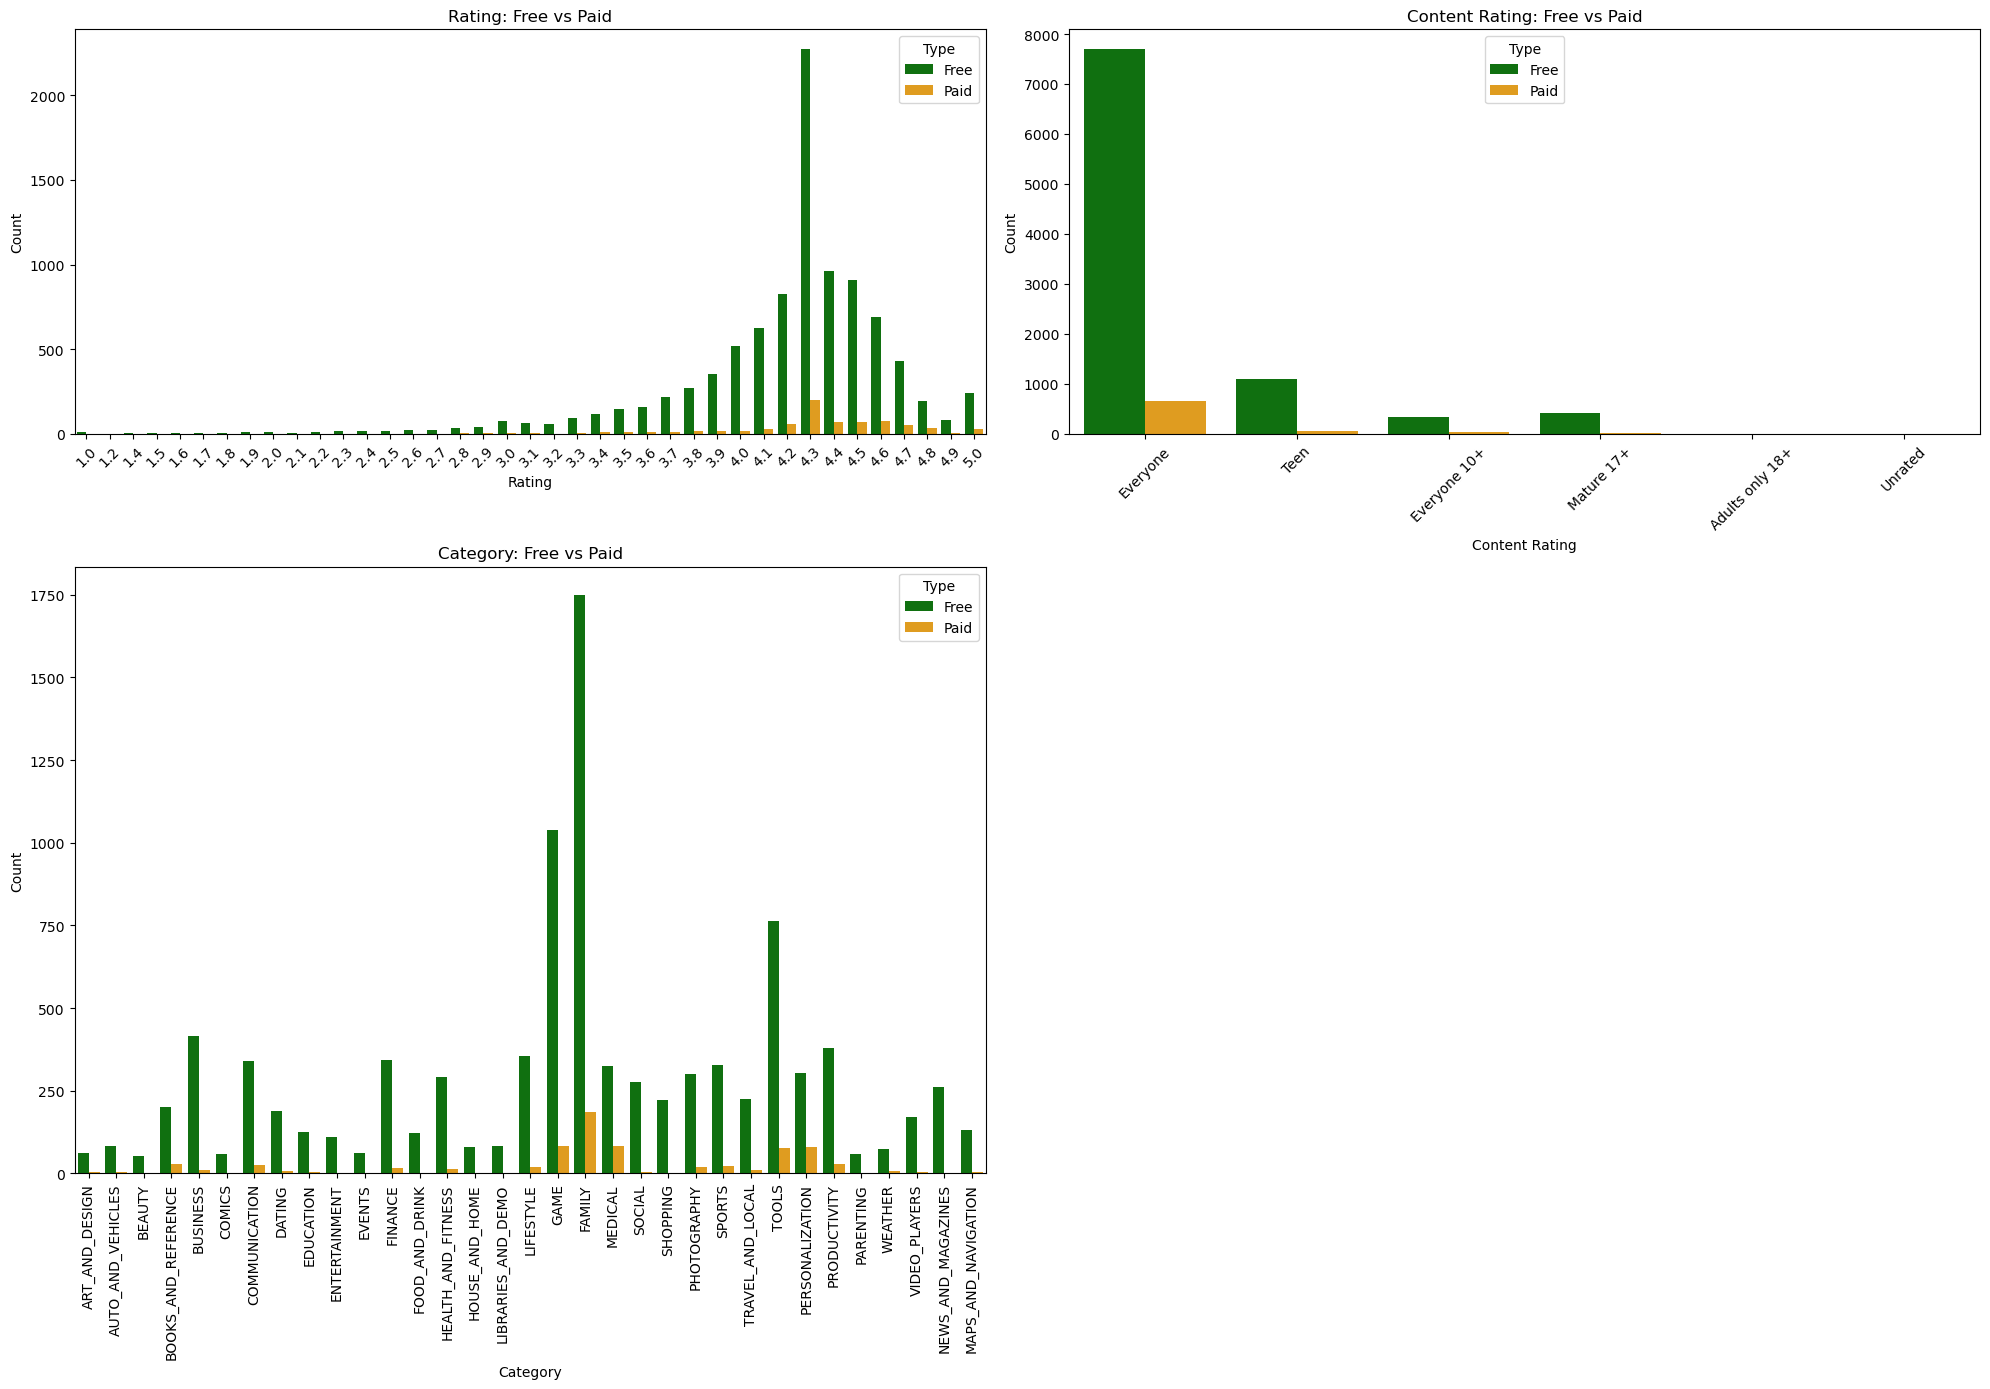

In [32]:
palette = {'Free': 'green', 'Paid': 'orange'}

# יצירת גרפים עם Seaborn
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14), gridspec_kw={'height_ratios': [1, 1.5]})
fig.delaxes(axes[1, 1])  # הסרת האקסטרה subplot שנוצר

sns.countplot(x='Rating', hue='Type', data=apps, palette=palette, ax=axes[0, 0]).set(title='Rating: Free vs Paid', xlabel='Rating', ylabel='Count')
sns.countplot(x='Content Rating', hue='Type', data=apps, palette=palette, ax=axes[0, 1]).set(title='Content Rating: Free vs Paid', xlabel='Content Rating', ylabel='Count')
sns.countplot(x='Category', hue='Type', data=apps, palette=palette, ax=axes[1, 0]).set(title='Category: Free vs Paid', xlabel='Category', ylabel='Count')

# סיבוב התוויות בציר ה-x
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

ניתן לראות את הקשר בין האפליקציות בחינם\בתשלום - לבין משתנים אחרים.

כגון הקטגוריות השונות, דירוג האפליקציה, סיווג האפליקציה על פי גילאים שונים. 

### נתרכז יותר בהבדל הדירוגים בין אפליקציות בתשלום ובין אפליקציות בחינם 

In [33]:
data_cleaned = apps.dropna(subset=['Rating', 'Type'])  # Remove rows with missing values in 'Rating' and 'Type' columns
data_cleaned = data_cleaned[data_cleaned['Type'].isin(['Paid', 'Free'])]  
# חישוב הדירוג הממוצע לאפליקציות בתשלום
average_rating_paid = data_cleaned[data_cleaned['Type'] == 'Paid']['Rating'].mean()

# חישוב הדירוג הממוצע לאפליקציות חינמיות
average_rating_free = data_cleaned[data_cleaned['Type'] == 'Free']['Rating'].mean()

print(f'The average rating of paid apps is: {round(average_rating_paid, 2)}')
print(f'The average rating of free apps is: {round(average_rating_free, 2)}')

The average rating of paid apps is: 4.27
The average rating of free apps is: 4.2


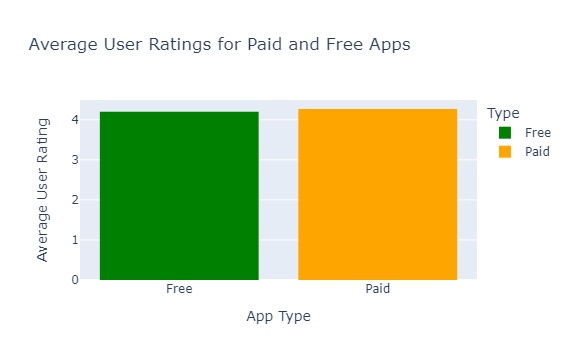

In [34]:
fig = px.histogram(apps, x='Type', y='Rating', color='Type', 
                   color_discrete_map={'Paid': 'orange', 'Free': 'green'}, 
                   title='Average User Ratings for Paid and Free Apps',
                   histfunc='avg')

# הגדרת שמות צירים
fig.update_layout(
    xaxis_title='App Type',
    yaxis_title='Average User Rating'
)

# הצגת הגרף
fig.show()

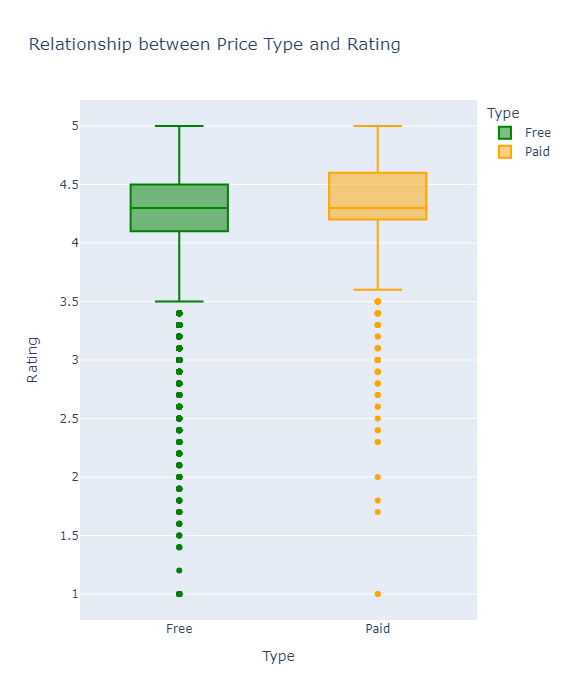

In [35]:
fig = px.box(apps, x='Type', y='Rating', color='Type',
             color_discrete_map={'Paid': 'orange', 'Free': 'green'},
             title='Relationship between Price Type and Rating',
             width=500, height=700)  # שינוי גודל הגרף

# הגדרת שמות צירים
fig.update_layout(
    xaxis_title='Type',
    yaxis_title='Rating'
)

# הצגת הגרף
fig.show()

ההבדל אמנם קטן, אך ניתן לראות כי בממוצע דירגו באופן גבוה אפליקציות בתשלום.

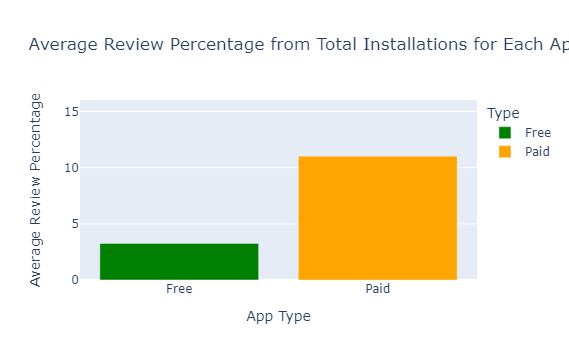

In [36]:

# חישוב אחוז הביקורות מסך כל ההתקנות לכל אפליקציה
apps['Review_Percentage'] = (apps['Reviews'] / apps['Installs']) * 100

# הסרת ערכים לא חוקיים בעמודת 'Review_Percentage'
apps = apps.dropna(subset=['Review_Percentage'])
apps = apps[apps['Review_Percentage'].apply(lambda x: isinstance(x, (int, float)))]

# חישוב הממוצע של אחוז הביקורות לפי סוג האפליקציה
average_review_percentage_df = apps.groupby('Type')['Review_Percentage'].mean().reset_index()
average_review_percentage_df.columns = ['Type', 'Average Review Percentage']

# יצירת גרף עמודות עם Plotly
fig = px.bar(average_review_percentage_df, x='Type', y='Average Review Percentage', 
             color='Type', color_discrete_map={'Paid': 'orange', 'Free': 'green'}, 
             title='Average Review Percentage from Total Installations for Each App')

# הגדרת שמות צירים
fig.update_layout(
    xaxis_title='App Type',
    yaxis_title='Average Review Percentage',
    yaxis_range=[0, max(average_review_percentage_df['Average Review Percentage']) + 5]
)

# הצגת הגרף
fig.show()


### תובנה 1:

הנחת היסוד הייתה שמשתמשים שרכשו אפליקציות בתשלום יהיו ביקורתיים יותר ויטו לדרג אותן בציונים נמוכים יותר, מכיוון שהם משקיעים משאבים כספיים ולכן יצפו לחווית משתמש משופרת. 

ניתוח הנתונים אכן הראה כי אחוז המשתמשים הפעילים בכתיבת ביקורות היה גבוה יותר עבור אפליקציות בתשלום, בהשוואה לאפליקציות חינמיות. 

לעומת זאת, בניגוד להנחה המקורית, התוצאות הצביעו על כך שהדירוג הממוצע של אפליקציות בתשלום היה גבוה יותר מזה של אפליקציות חינמיות.

לסיכום, קיימת פעילות ביקורתית רבה יותר מצד משתמשים באפליקציות בתשלום, ועם זאת, הם נוטים להעניק דירוגים גבוהים יותר לאפליקציות אלה. לכן, ניתן להסיק מכך שההשקעה הכספית כחברה באפליקציות בתשלום משתלמת, ורואים זאת גם על חווית המשתמש והמעורבות שלו.

<a id="הקשר-בין-גודל-האפליקציה-לפופולריות-שלה"></a>
## 3.1 הקשר בין גודל האפליקציה לפופולריות שלה

[back to top](#top)


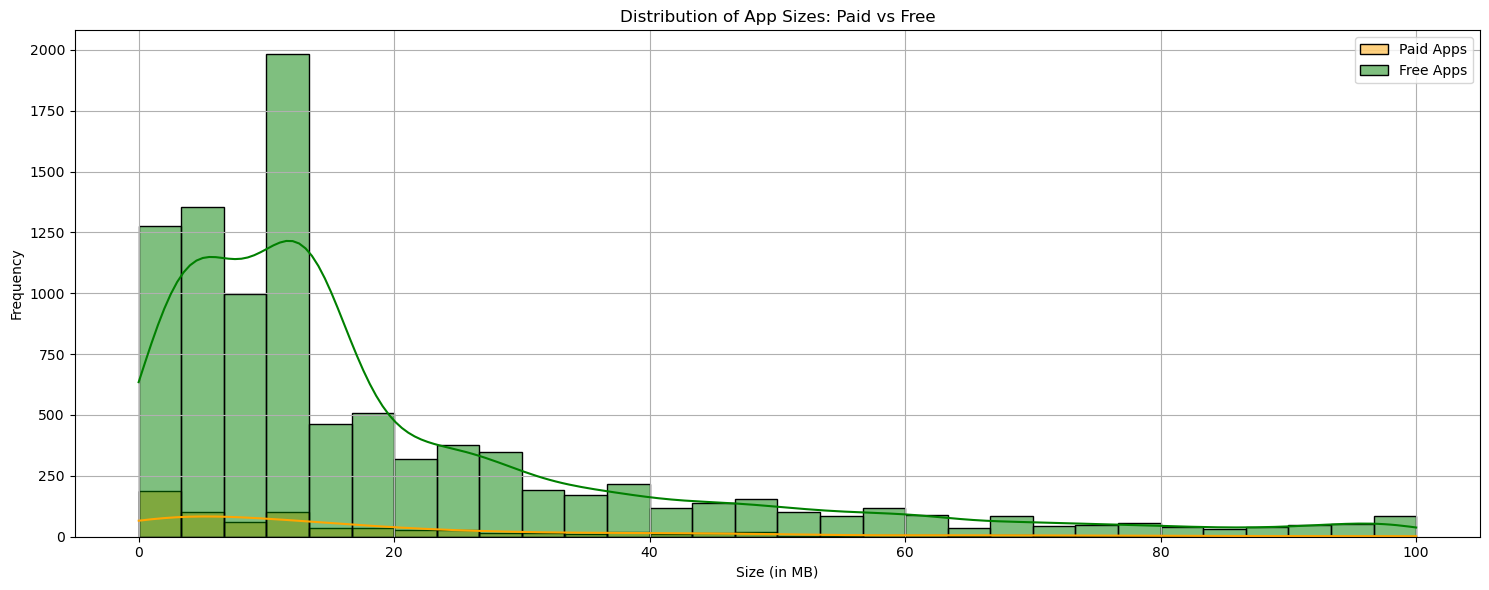

In [37]:

# סינון האפליקציות בתשלום
paid_apps = apps[apps['Type'] == 'Paid']

# סינון האפליקציות החינמיות
free_apps = apps[apps['Type'] == 'Free']

# התפלגות גדלי האפליקציות בתשלום בהשוואה לחינמיות
plt.figure(figsize=(15, 6))
sns.histplot(paid_apps['Size_MB'], color='orange', label='Paid Apps', kde=True, bins=30)
sns.histplot(free_apps['Size_MB'], color='green', label='Free Apps', kde=True, bins=30)
plt.title('Distribution of App Sizes: Paid vs Free')
plt.xlabel('Size (in MB)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

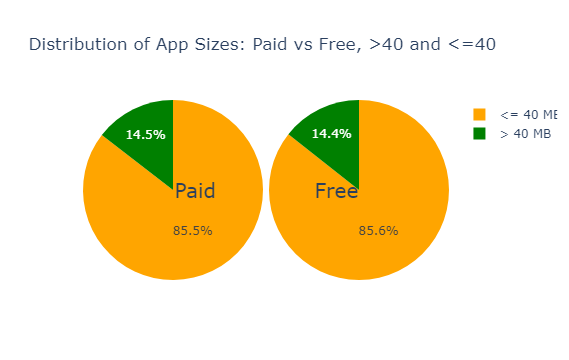

In [38]:

# סינון האפליקציות בתשלום ובחינם והסרת ערכים חסרים בעמודת 'Size_MB'
paid_apps = apps[apps['Type'] == 'Paid']
free_apps = apps[apps['Type'] == 'Free']

# חישוב מספר האפליקציות לפי קטגוריות גודל
size_counts = {
    'Paid': [paid_apps[paid_apps['Size_MB'] <= 40].shape[0], paid_apps[paid_apps['Size_MB'] > 40].shape[0]],
    'Free': [free_apps[free_apps['Size_MB'] <= 40].shape[0], free_apps[free_apps['Size_MB'] > 40].shape[0]]
}

# יצירת גרף עוגה באמצעות Plotly
fig = go.Figure()
for i, (app_type, counts) in enumerate(size_counts.items()):
    fig.add_trace(go.Pie(labels=['<= 40 MB', '> 40 MB'], values=counts, name=app_type,
                         marker_colors=['orange', 'green'], domain={'x': [i*0.5, (i+1)*0.5]}))

# עדכון פרטי התצוגה של הגרפים
fig.update_layout(title_text='Distribution of App Sizes: Paid vs Free, >40 and <=40',
                  annotations=[dict(text=key, x=(i*0.5 + (i+1)*0.5)/2, y=0.5, font_size=20, showarrow=False)
                               for i, key in enumerate(size_counts.keys())])

# הצגת הגרף
fig.show()


ניתן לראות באופן ברור כי קרוב ל86% מסך האפליקציות הם בעלות גודל יחסית קטן.

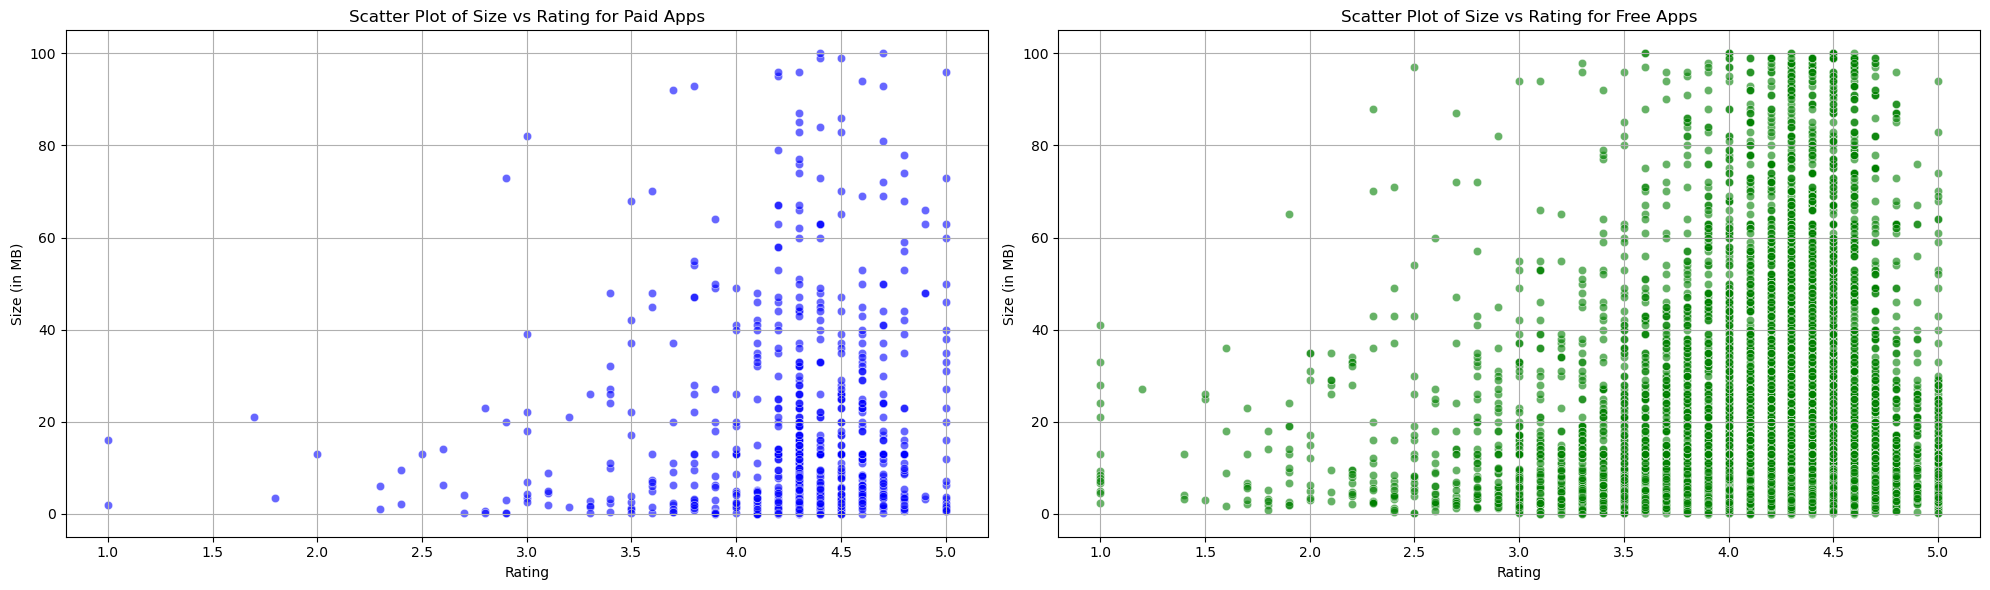

In [39]:

# סינון האפליקציות בתשלום
paid_apps = apps[apps['Type'] == 'Paid']

# הסרת ערכים חסרים בעמודות 'Rating' ו-'Size_MB'
paid_apps = paid_apps.dropna(subset=['Rating', 'Size_MB'])

# סינון האפליקציות החינמיות
free_apps = apps[apps['Type'] == 'Free']

# הסרת ערכים חסרים בעמודות 'Rating' ו-'Size_MB'
free_apps = free_apps.dropna(subset=['Rating', 'Size_MB'])

# יצירת גרף פיזור להשוואת גודל האפליקציה לדירוג עבור אפליקציות בתשלום וחינמיות
plt.figure(figsize=(20, 6))

# גרף פיזור עבור אפליקציות בתשלום
plt.subplot(1, 2, 1)
sns.scatterplot(data=paid_apps, x='Rating', y='Size_MB', color='blue', alpha=0.6)
plt.title('Scatter Plot of Size vs Rating for Paid Apps')
plt.xlabel('Rating')
plt.ylabel('Size (in MB)')
plt.grid(True)

# גרף פיזור עבור אפליקציות חינמיות
plt.subplot(1, 2, 2)
sns.scatterplot(data=free_apps, x='Rating', y='Size_MB', color='green', alpha=0.6)
plt.title('Scatter Plot of Size vs Rating for Free Apps')
plt.xlabel('Rating')
plt.ylabel('Size (in MB)')
plt.grid(True)

plt.tight_layout()
plt.show()


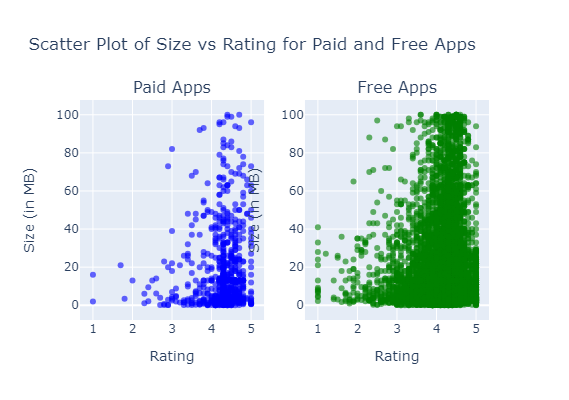

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# סינון האפליקציות בתשלום והסרת ערכים חסרים
paid_apps = apps[apps['Type'] == 'Paid'].dropna(subset=['Rating', 'Size_MB'])

# סינון האפליקציות החינמיות והסרת ערכים חסרים
free_apps = apps[apps['Type'] == 'Free'].dropna(subset=['Rating', 'Size_MB'])

# יצירת גרפים כפולים עם Plotly
fig = make_subplots(rows=1, cols=2, subplot_titles=("Paid Apps", "Free Apps"))

# גרף פיזור עבור אפליקציות בתשלום
scatter_paid = go.Scatter(x=paid_apps['Rating'], y=paid_apps['Size_MB'], mode='markers',
                          marker=dict(color='blue', opacity=0.6), name='Paid Apps')
fig.add_trace(scatter_paid, row=1, col=1)

# גרף פיזור עבור אפליקציות חינמיות
scatter_free = go.Scatter(x=free_apps['Rating'], y=free_apps['Size_MB'], mode='markers',
                          marker=dict(color='green', opacity=0.6), name='Free Apps')
fig.add_trace(scatter_free, row=1, col=2)

# עדכון פרטי התצוגה של הגרפים
fig.update_layout(title_text='Scatter Plot of Size vs Rating for Paid and Free Apps',
                  width=1100, height=400, showlegend=False)

# הגדרת שמות צירים לכל גרף בנפרד
fig.update_xaxes(title_text='Rating', row=1, col=1)
fig.update_yaxes(title_text='Size (in MB)', row=1, col=1)

fig.update_xaxes(title_text='Rating', row=1, col=2)
fig.update_yaxes(title_text='Size (in MB)', row=1, col=2)

# הצגת הגרף
fig.show()


### תובנה 2:

רוב האפליקציות הן בעלות גודל קטן הן בתשלום והן בחינם. אם נתמקד באפליקציות בתשלום, ניתן לראות באופן ברור וחד יותר כי ישנה העדפת משתמש לאפליקציות **קלות משקל**. ע"פ דירוג המשתמשים ניתן לראות כי אפליקציה בתשלום שהיא כבדה עשויה שלא להצליח בשוק.

מסקנה 2 - 
מציאת הקשר בין דירוג האפליקציות לבין סיווג האפליקציות לפי סוגי האוכלוסיות השונות

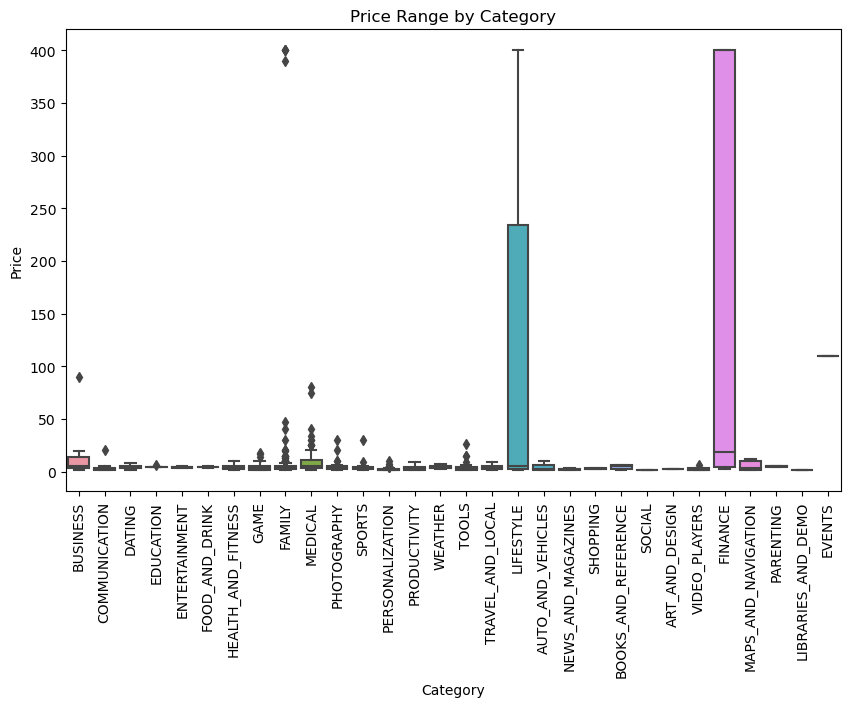

In [61]:
paid_apps = apps[apps['Type'] == 'Paid']

# Create a box plot for Price by Category using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=paid_apps, x='Category', y='Price')
plt.title('Price Range by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [67]:
free_apps = apps[apps['Price'] == 0]
paid_apps = apps[apps['Price'] > 0]
free = free_apps['Category'].value_counts().sort_index().to_frame()
paid = paid_apps['Category'].value_counts().sort_index().to_frame()
total = apps['Category'].value_counts().sort_index().to_frame()
free.columns = ['free']
paid.columns = ['paid']
total.columns = ['total']
fig = free.join(paid).join(total)
fig['%paid'] = fig['paid'] * 100 / fig['total']
fig['%free'] = fig['free'] * 100 / fig['total']
fig = fig.sort_values('%paid', ascending=False)
fig

,free,paid,total,%paid,%free
PERSONALIZATION,305,80.0,385,20.779221,79.220779
MEDICAL,324,83.0,407,20.393120,79.606880
BOOKS_AND_REFERENCE,201,28.0,229,12.227074,87.772926
WEATHER,74,8.0,82,9.756098,90.243902
FAMILY,1748,183.0,1931,9.476955,90.523045
TOOLS,763,77.0,840,9.166667,90.833333
GAME,1038,83.0,1121,7.404103,92.595897
COMMUNICATION,339,27.0,366,7.377049,92.622951
SPORTS,327,24.0,351,6.837607,93.162393
PRODUCTIVITY,379,27.0,406,6.650246,93.349754


בטבלה זו אנו רואים את היחס בין כמות האפליקציות הקיימות בחינם לאלו בתשלום לפי קטגוריות. ניתן לראות כי הקטגוריות "התאמה אישית" ו-"בריאות" הן הקטגוריות שבהן יש באופן יחסי כמות רבה של אפליקציות בתשלום

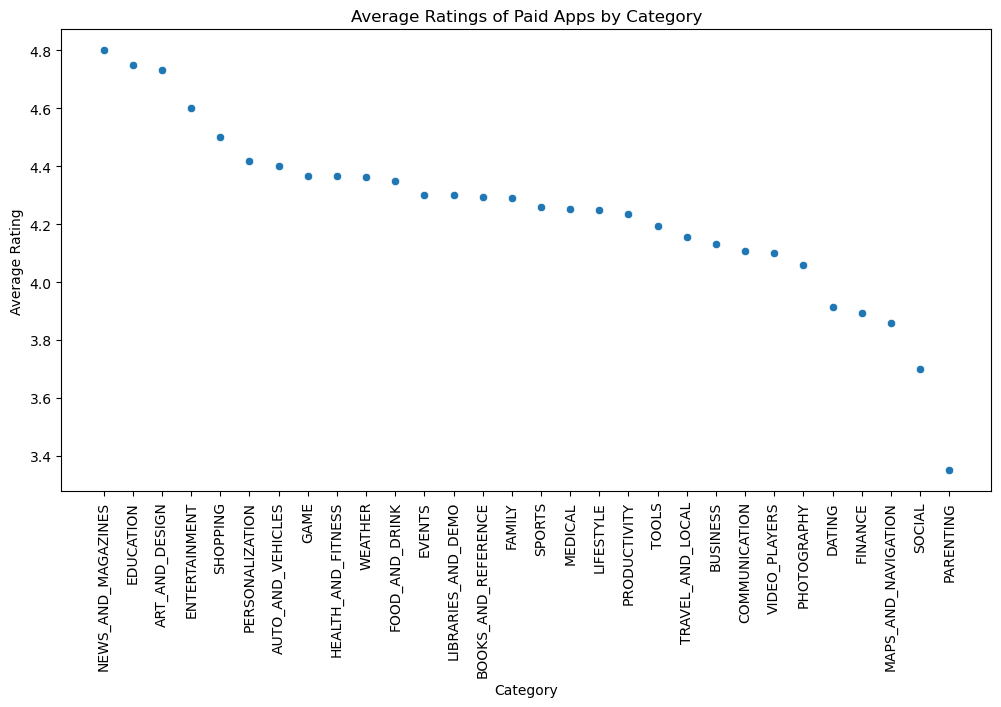

In [68]:
avg_ratings = paid_apps.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# גרף נקודות עבור הדירוג הממוצע לאפליקציות בתשלום לפי קטגוריה
plt.figure(figsize=(12, 6))
sns.scatterplot(x=avg_ratings.index, y=avg_ratings.values)
plt.title('Average Ratings of Paid Apps by Category')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.show()

בגרף נקודות זה אנו רואים דבר מעניין, הקטגוריות של האפליקציות בתשלום עם הממוצע ביקורות הגבוה ביותר אינו שייך לאותן קטגוריות הקיימות באופן יחסי במידה רבה לעומת האפליקציות בחינם, כמו שראינו בטבלה לעיל.

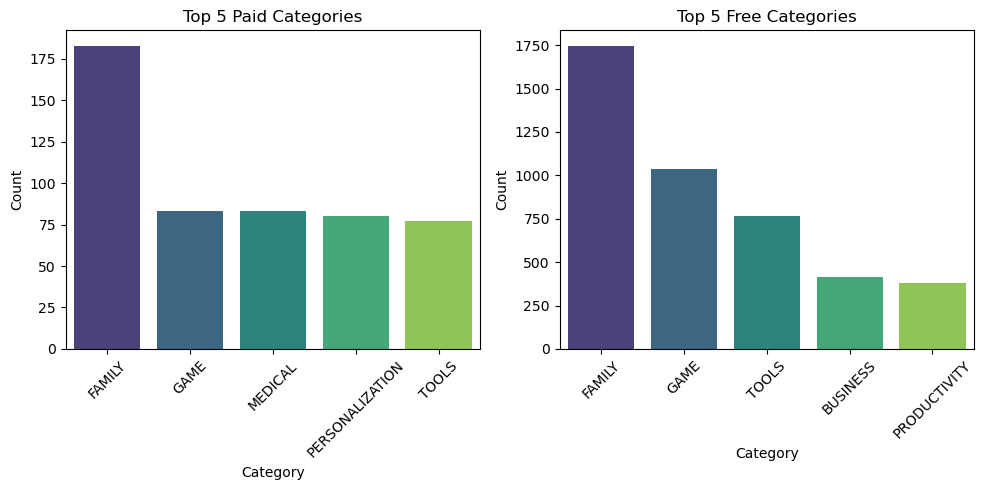

In [63]:
# סינון הנתונים עבור האפליקציות שבתשלום
paid_apps = apps[apps['Type'] == 'Paid']

# סינון הנתונים עבור האפליקציות שבחינם
free_apps = apps[apps['Type'] == 'Free']

# מציאת ה-5 קטגוריות התכופות ביותר שבתשלום
top_5_paid_categories = paid_apps['Category'].value_counts().head(5)

# מציאת ה-5 קטגוריות התכופות ביותר בחינם
top_5_free_categories = free_apps['Category'].value_counts().head(5)

# קביעת גודל התמונה
plt.figure(figsize=(10, 5))

# subplot עבור גרף הקטגוריות בתשלום
plt.subplot(1, 2, 1)
sns.countplot(data=paid_apps, x='Category', order=top_5_paid_categories.index, palette='viridis')
plt.title('Top 5 Paid Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# subplot עבור גרף הקטגוריות בחינם
plt.subplot(1, 2, 2)
sns.countplot(data=free_apps, x='Category', order=top_5_free_categories.index, palette='viridis')
plt.title('Top 5 Free Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# תצוגת הגרפים
plt.tight_layout()
plt.show()


### תובנת ביניים 
 גרפים אלו מציגים את 5 הקטגוריות בעלות ההורדות הרבות ביותר. ניתן לראות שאפליקציות מקטגורית משפחה הן הכי מבוקשות גם בתשלום וגם בחינם. עוד ניתן לראות כי אנשים מוכנים לשלם עבור
אפליקציות הנוגעות לבריאותם, אפילו יותר משמוכנים לשלם על משחקים. לא כך הדבר כשמדובר באפליקציות בחינם.

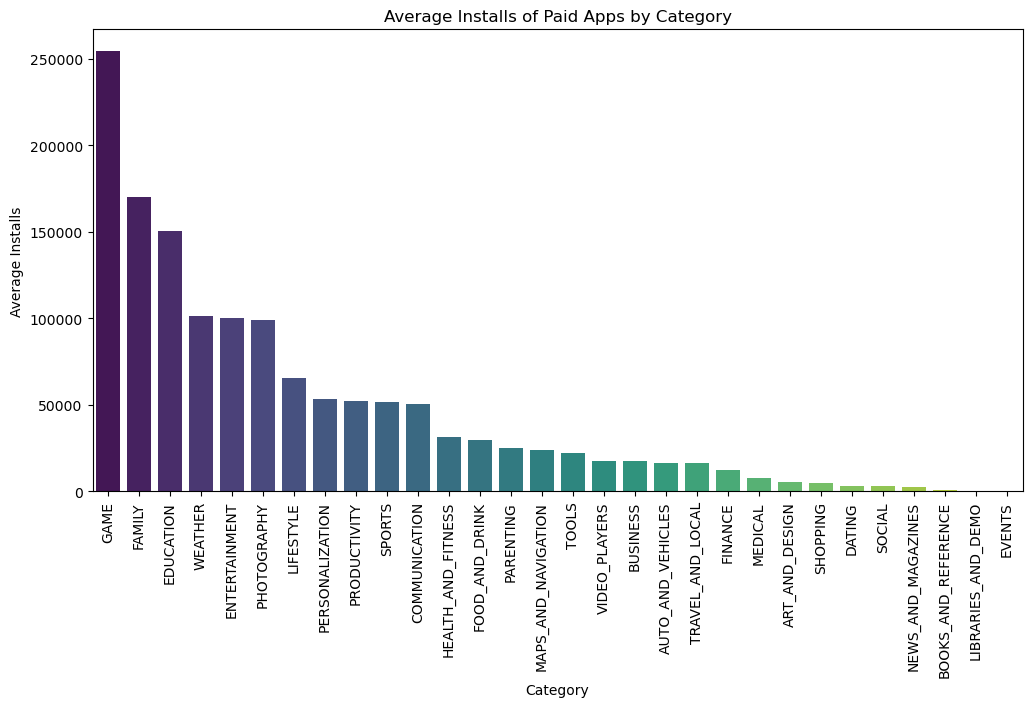

In [55]:
# חישוב כמות ההתקנות הממוצעת לכל קטגוריה
avg_installs = paid_apps.groupby('Category')['Installs'].mean().sort_values(ascending=False)

# גרף עמודות עבור כמות ההתקנות הממוצעת לאפליקציות בתשלום לפי קטגוריה
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_installs.index, y=avg_installs.values, palette='viridis')
plt.title('Average Installs of Paid Apps by Category')
plt.xticks(rotation=90)
plt.ylabel('Average Installs')
plt.show()

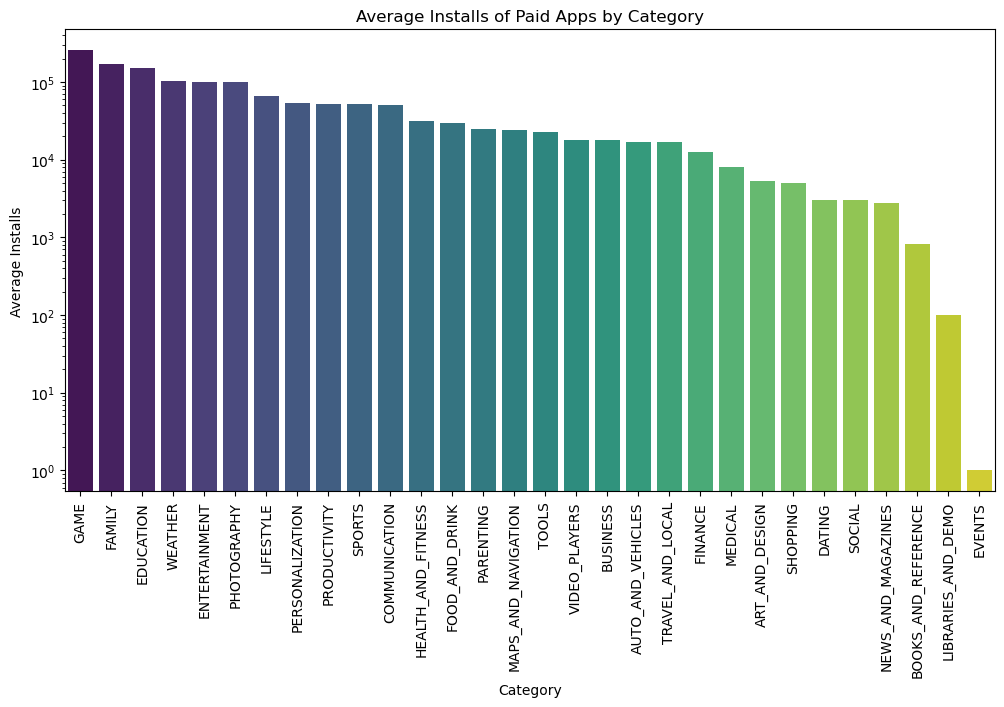

In [69]:
paid_apps = apps[apps['Type'] == 'Paid']

# Calculate the average installs per category
avg_installs = paid_apps.groupby('Category')['Installs'].mean().sort_values(ascending=False)

# Create a bar plot for average installs per category with log scale
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_installs.index, y=avg_installs.values, palette='viridis')
plt.title('Average Installs of Paid Apps by Category')
plt.xticks(rotation=90)
plt.ylabel('Average Installs')
plt.yscale('log')  # Apply log scale to the y-axis
plt.show()

for i in apps['Content Rating'].unique():
    plt.figure(figsize=(12,6))
    sns.countplot(data=paid_apps, x='Category', order=top_5_paid_categories.index, palette='viridis')
    plt.xlabel('Genres')
    plt.ylabel('App')
    plt.title(i+' App')
    plt.xticks(rotation=80)